# Estimation of False Discovery Rate with qvalue 
John D. Storey, Andrew J. Bass, Alan Dabney and David Robinson
  (2019). qvalue: Q-value estimation for false discovery rate control.
  R package version 2.16.0. http://github.com/jdstorey/qvalue
<br>
The original paper from Storey and Tibshirani introducing the concepts implemented in this package is available here https://www.pnas.org/content/100/16/9440
<br>
<br>
Briefly, qvalue takes in p-values and adjusts them to account for the multiple hypothesis tests. If you are new to multiple hypothesis testing, check out this article from Noble (2009) for a succint overview of the concept. 
https://www.nature.com/articles/nbt1209-1135
<br>
<br>
Multiple hypothesis testing is inherent to RNA-seq differential expression (DE) analysis and we will use this example to illustrate how we use qvalue to provide actionable results to our clients.

###### Definition of terms
Accurate interpretation of unadjusted p-values assumes that each gene is assessed for DE on its own. However, most RNA-seq experiments assess more than one gene at a time. In order to  account for the number of genes we are testing, we must calculate and interpret the adjusted p-value for each gene. 
<br>
<br>
In DE analysis, a single p-value tells you how likely it is that a single gene is differentially expressed between at least two groups (ex: a control and a treatment group) due to some actual difference between the groups as opposed to random chance. 
<br>
<br>
False Discovery Rate (FDR) tells you how likely it is that all genes identified as DE are false positives. A FDR of 5% means that among all genes called DE, an average of 5% of those are truly not DE. The q-value is the significance threshold adjusted for the fact that we have assessed muliple genes.

Our very first step is to load the qvalue package rom Bioconductor. Please see http://bioconductor.org/ for information about installation and use of Bioconductor and its packages.

In [9]:
library(qvalue)

## Loading p-values
qvalue gives us a few options for calculating q-values but to keep our example simplified we import a table of p-values from a t-test conducted on RNA-seq count data.

In [2]:
pvals=("GH_pvals.csv")
pvalues <- read.table(pvals, header=TRUE, sep=",")
pvalues <- pvalues$P

## Checking assumptions
<br>
Next, we check out the histogram of the p-values. This allows us to examine the distribution of the p-values and check the package's assumption that they should be relatively uniform. This means they will look like one big slope with a high frequency of values of 0.0 (left side) and lower and lower values towards the right of the graph. 
<br>
<br>
If this assumption is not met and your p-values look like a U shape, sine curve, or any other funky thing, this package will provide you with faulty analysis if you do not do something to make that assumption hold. Please contact EICC and depending on why your p-values are looking unusual we may be able to fix it for you.

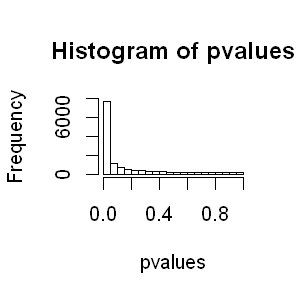

In [3]:
options(repr.plot.width=2.5, repr.plot.height=2.5)
hist(pvalues, nclass=20)

In our simplified example, the p-values satisfy our assumption. The histogram has a lovely slope down from 0.0. We can safely move on.

# Creating the qvalue object

Next, we create the qvalue object. qvalue gives us many options to do this. These all matter and all vary by project as to which are appropriate, the default options are not going to work for everyone, if anyone. 
<br>
<br>
For this example we have done our literature review and decided (prior to running our sequencing) that we are comfortable with FDR of 0.1 (10%). Recall that this means that of all genes called DE, an average of 10% of those are false positives. In our case this would mean if we have 100 genes that are called DE, we are comfortable with up to 10 of them being false positives. This is the assumption that a popular DE analysis package, edgeR, makes and the accuracy of the results you get from edgeR depend on these assumptions.

###### Control vs. Estimation of FDR
<br>
In controlling FDR, you set a FDR you are comfortable with a priori, you run your sequencing, you do your pairwise comparisons, and you see which genes meet that pre-specified FDR threshold. In estimating FDR, you run your sequencing, do your pairwise comparisons tests, and afterwards, you specify how comfortable you are with the possibility that a gene or group of genes which have been called DE is/are false positives.
<br>
<br>
Estimating FDR means that you run the risk of missing DE genes you may be interested in investivating. Controlling FDR means that you may have more genes identifed as DE than you can make sense of and many of them may be false positives. The choice you make depends on whether your experiment is exploratory or looking to assess one or a group of genes in particular. EICC would be happy to work with you to design your experiment to meet your goals.

In [4]:
qobj<-qvalue(p=pvalues, fdr.level=0.05, lambda=0, pi0.method="smoother")

## Summarizing Results
<br>
Below is a summary of some of the information available to us in the qvalue object.

In [5]:
summary(qobj)


Call:
qvalue(p = pvalues, fdr.level = 0.05, lambda = 0, pi0.method = "smoother")

pi0:	1	

Cumulative number of significant calls:

          <1e-04 <0.001 <0.01 <0.025 <0.05 <0.1    <1
p-value     1113   2721  5249   6623  7735 8960 14527
q-value       24    911  3666   5058  6413 7874 14527
local FDR     29    481  2155   3263  4092 5089  9496



From this summary we see that at our pre-specified FDR of 0.1 we determine that all genes with q-values less than or equal to 0.1 are significant. This gives us 7874 significant genes with the understanding that up to 787 DE genes are false positives. 
<br>
<br>
Controlling FDR gave us a large number of genes to investigate further. We decided that we would risk up to 10% of these being false positives if we could find as many DE genes as possible. We do not know how likely it is that any one of the genes we found is a false positive but we know it could be any or all 787 of them.
<br>
<br>
If we had decided at the beginning to estimate FDR, we could have used the q-value of <0.001 and had a list of 911 genes to follow up on along with an estimate of how likely it is that each gene is a false positive, and comfortable with up to 9 of them being false positives.
<br>
<br>
This choice of controlling or estimating FDR is one EICC is happy to help you make to get the most actionable results from your projects.

## Visualization

qvalue also offers a number of visualization options to assess your findings. Here is one example of the types of plots you can generate. 
<br>
<br>
Overall, these graphs show us how closely our estimate of the null hypothesis (that no genes are DE) resembles reality, how many genes are DE, and how many false positives we can expect from our q-value cut-off.

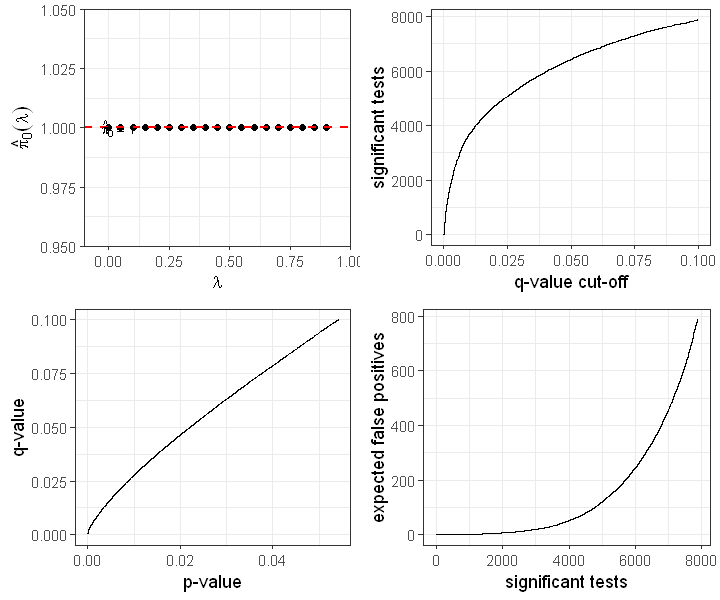

In [6]:
options(repr.plot.width=6, repr.plot.height=5)
plot(qobj)

For a more specific application and interpretation of these or additional tools and visualizations for your own data, please find our contact information here https://www.cores.emory.edu/eicc/about/index.html

Information about our R session is available below

In [10]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18362)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] qvalue_2.16.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.2       magrittr_1.5     splines_3.6.0    tidyselect_0.2.5
 [5] munsell_0.5.0    uuid_0.1-2       colorspace_1.4-1 R6_2.4.0        
 [9] rlang_0.4.0      stringr_1.4.0    plyr_1.8.4       dplyr_0.8.3     
[13] tools_3.6.0      grid_3.6.0       gtable_0.3.0     htmltools_0.3.6 
[17] lazyeval_0.2.2   digest_0.6.20    assertthat_0.2.1 tibble_2.1.3    
[21] crayon_1.3.4     IRdisplay_0.7.0  reshape2_1.4.3   purrr_0.3.2     
[25] ggplo